In [1]:
    %matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#Data is a list of lists in the format of x coordinate,y coordinate,class

data = [[3.2,  1.5, 1],
        [2,   1,    0],
        [4.1,  1.5, 1],
        [2.75,  1,  0],
        [3.56, .5,  1],
        [2,   .5,   0],
        [5.5,  1,   1],
        [1,    1,   0],
        [4,    1,   1],
        [0,    0,   0],
        [1,   0.5,  0]]

rand_x = np.random.uniform(0,6)
rand_y = np.random.uniform(0,2)
mystery_point = [rand_x, rand_y]

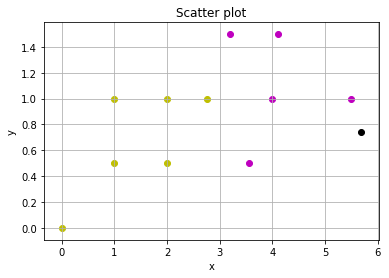

In [21]:
# scatter plot them
def data_grid():
    plt.grid()

    for i in range(len(data)):
        c = 'm'
        if data[i][2] == 0:
            c = 'y'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_point[0]], [mystery_point[1]], c='k')

plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")
data_grid()

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_dx(x):
    return sigmoid(x) * (1-sigmoid(x))

w1 = 3.6503254464292083
w2 = 0.731536749803176
b = -11.708721507323466
Minimum Loss value 0.08452908651269374  Locate at index 497  of loss valeus array


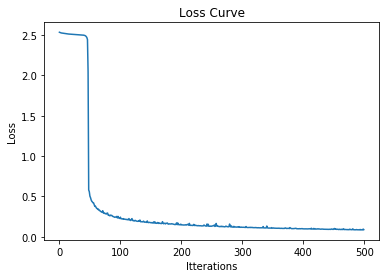

In [31]:
def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 50000
    learning_rate = 0.1
    loss_values = [] # keep loss values during training, to see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # predicted value
        
        target = point[2] # actual value of label
        
        # MSE for point
        loss = 0.5*np.square(pred - target)
        
        # Append the loss over all data points every 1000 iterrations
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += 0.5*np.square(p_pred - p[2])
            loss_values.append(c)
        
        dloss_dpred = (pred - target) # differentiate 0.5 * (y_p - y_a)^2 -> y_p - y_a
        dpred_dz = sigmoid_dx(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dloss_dz = dloss_dpred * dpred_dz
        
        dloss_dw1 = dloss_dz * dz_dw1
        dloss_dw2 = dloss_dz * dz_dw2
        dloss_db = dloss_dz * dz_db
        
        w1 = w1 - learning_rate * dloss_dw1
        w2 = w2 - learning_rate * dloss_dw2
        b = b - learning_rate * dloss_db
        
    return loss_values, w1, w2, b

loss_values, w1, w2, b = train()

fig = plt.plot(loss_values),plt.title("Loss Curve"),plt.xlabel("Itterations"),plt.ylabel("Loss")
print("w1 =",w1)
print("w2 =",w2)
print("b =",b)
print("Minimum Loss value",np.min(loss_values)," Locate at index",np.argmin(loss_values)," of loss valeus array")

Our mystery point has a value of:  0.03026703542597249  therefore it's class is most likely 0


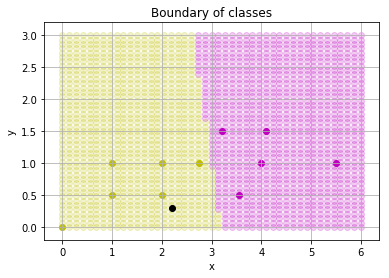

In [19]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 45):
    for y in np.linspace(0, 3, 45):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'y'
        if pred > .5:
            c = 'm'
        plt.scatter([x],[y],c=c, alpha=.2)
        
plt.title("Boundary of classes")
plt.xlabel("x")
plt.ylabel("y")
# Plot points over network predictions
# What we can see here is our decision boundary between tellow and magenta points
data_grid()
z = w1 * mystery_point[0] + w2 * mystery_point[1] + b
point_prediciton =  sigmoid(z)
if point_prediciton > 0.5:
    print("Our mystery point has a value of: ",point_prediciton," therefore it's class is most likely 1")
else:
    print("Our mystery point has a value of: ",point_prediciton," therefore it's class is most likely 0")